<a href="https://colab.research.google.com/github/shahidx0x/Cabage-Pest-Detection-Model/blob/main/ipest_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting up working directory**

In [1]:
import os
download_path = '/content/drive/MyDrive/'
os.chdir(download_path)
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive


# **Setting up YoLo-v5 model**

In [3]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [4]:
%cd yolov5/

/content/drive/MyDrive/yolov5


In [5]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00


# **Testing out the the model**

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-26 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

100%|██████████| 14.1M/14.1M [00:01<00:00, 11.8MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
img = 'https://media.istockphoto.com/id/513106144/photo/traffic-on-highway-with-cars.jpg?s=612x612&w=0&k=20&c=dXm6BH6TnIHFu202PlQJNdM12lZQBt11Tkbqx85rHdQ='

In [10]:
results = model(img)
results.print()

image 1/1: 398x612 14 cars, 4 trucks
Speed: 72.8ms pre-process, 74.8ms inference, 43.9ms NMS per image at shape (1, 3, 416, 640)


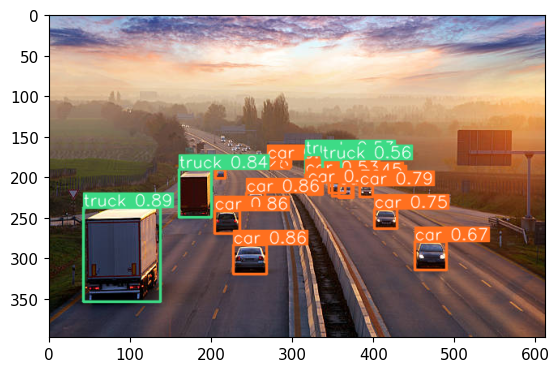

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## **Train the YoLo-v5 with custom dataset**

In [12]:
filename = '/content/drive/MyDrive/yolov5/dataset.yml'
with open(filename, 'r') as file:
    content = file.read()
print(content)

path: /content/drive/MyDrive/train  
val: images
train: images
nc: 19
names : [
'dog',
'person',
'cat',
'tv',
'car',
'meatballs',
'marinara sauce',
'tomato soup',
'chicken noodle soup',
'french onion soup',
'chicken breast',
'ribs',
'pulled pork',
'hamburger',
'cavity',
'aphids',
'dmoth',
'looper',
'whitefly']


In [13]:
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-186-g0acc5cf Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,

## **Test the custom model**

In [15]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-6-26 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [16]:
img = "/content/drive/MyDrive/train/images/Image_24.jpg"

In [17]:
results = model(img)

In [18]:
results.print()

image 1/1: 608x608 1 dmoth
Speed: 18.5ms pre-process, 45.5ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)


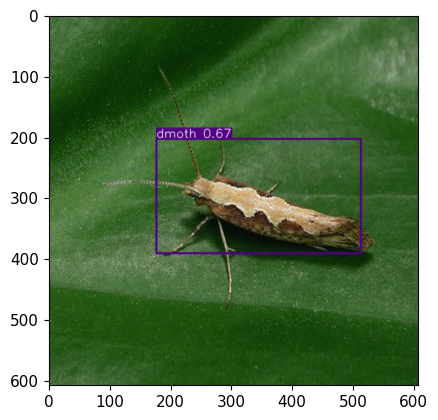

In [19]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

## **Test model with video**

In [29]:
input_video_path = '/content/drive/MyDrive/train/looper.mp4'
output_video_path = '/content/drive/MyDrive/train/looper_out.mp4'

In [30]:
cap = cv2.VideoCapture(input_video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

In [31]:
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
output_video = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

In [32]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    annotated_frame = np.squeeze(results.render())
    output_video.write(annotated_frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
output_video.release()
cv2.destroyAllWindows()